In [101]:
# importing libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
import random 
import math 
import time 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
# from sklearn.metrices import mean_squared_error, mean_absolute_error
import datetime 
import operator 
plt.style.use('seaborn')
# %matplot inline

In [102]:
# loading all the three datasets 
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [103]:
deaths_reported = pd.read_csv('time_series_covid19_deaths_global.csv')

In [104]:
recovered_cases = pd.read_csv('time_series_covid19_recovered_global.csv')

In [105]:
# Display he head of the dataset
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680


In [106]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32852,32879,32977,33045,33058,33058,33064,33114,33118,33308
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8675,8825,8965,9115,9215,9304,9406,9500,9585,9675
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36578,36672,36763,36857,36958,37067,37170,37170,37382,37492
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1540,1615,1615,1715,1715,1814,1814,1814,1928,1928
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2577,2591,2598,2598,2635,2685,2716,2743,2744,2761


In [107]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1462,1466,1467,1469,1470,1472,1473,1477,1479,1480
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,396,400,403,407,411,413,416,420,424,429
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1760,1768,1768,1771,1783,1789,1795,1801,1809,1818
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,54,55,55,55,57,57
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,195,199,211,211,208,212,218,218,219,222


In [108]:
# Extracting all the columns using .keys() functions 
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/4/20', '10/5/20', '10/6/20', '10/7/20', '10/8/20', '10/9/20',
       '10/10/20', '10/11/20', '10/12/20', '10/13/20'],
      dtype='object', length=270)

In [114]:
# Extracting omly dates columns that have infomration of coinformed, deaths and reported cases 
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]

In [110]:
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]

In [111]:
recovered = recovered_cases.loc[:,cols[4]:cols[-1]]

In [112]:
# Check the head of the outbreak cases 
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20
0,0,0,0,0,0,0,0,0,0,0,...,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928
1,0,0,0,0,0,0,0,0,0,0,...,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752
2,0,0,0,0,0,0,0,0,0,0,...,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399
3,0,0,0,0,0,0,0,0,0,0,...,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995
4,0,0,0,0,0,0,0,0,0,0,...,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680


In [116]:
# Finding the total confirmed cases, death cases and recovereed cases and append them to four empty lists. 
# Also calcualte the total mortality rate i.e. the death_sum/confirmed_cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [123]:
# Displaying the neewly created variables 
# Total confirmed cases 
confirmed_sum

38129806

In [124]:
# Total death cases
death_sum

1086141

In [125]:
# Total recovered casse 
recovered_sum

26466156

In [120]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69051,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84121,
 86014,
 88397,
 90375,
 92959,
 95276,
 98040,
 102040,
 106102,
 110062,
 114025,
 119036,
 126717,
 132506,
 146887,
 157965,
 169258,
 184002,
 199932,
 219462,
 246618,
 277253,
 309223,
 343456,
 386823,
 428295,
 479279,
 542006,
 606988,
 674380,
 733777,
 799018,
 875842,
 952368,
 1033702,
 1116958,
 1197315,
 1269291,
 1342524,
 1420265,
 1504296,
 1590776,
 1678316,
 1754531,
 1849884,
 1920029,
 1991375,
 2073248,
 2170168,
 2257981,
 2331375,
 2411347,
 2485850,
 2561729,
 2639748,
 2727991,
 2812178,
 2895859,
 2968049,
 3037754,
 3113246,
 3190735,
 3274139,
 3361356,
 3441576,
 3518135,
 3595235,
 3675767,
 3765725,
 3854800,
 3946080,
 4031014,
 4106229,
 4183146,
 4267441,
 4352288

In [121]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

In [122]:
mortality_rate

[0.03063063063063063,
 0.027522935779816515,
 0.02763018065887354,
 0.029288702928870293,
 0.02644003777148253,
 0.02801503245644004,
 0.023485120114736465,
 0.021566401816118047,
 0.020765027322404372,
 0.021456633423995165,
 0.021515201860774213,
 0.021564305712753917,
 0.021421028812792276,
 0.020587496861662065,
 0.02040299533335745,
 0.020582410804142453,
 0.020903593441097802,
 0.02170751413950983,
 0.0225597609561753,
 0.02368537959737193,
 0.024837651469505256,
 0.024718653960954254,
 0.02270544201914478,
 0.022762259187852157,
 0.024127094466408885,
 0.024847336281322383,
 0.0254947454619899,
 0.026719182456887376,
 0.028062708190133772,
 0.029496667191518396,
 0.029307270858005493,
 0.031284191241953134,
 0.031272948266693676,
 0.03306263042767707,
 0.03370688690157838,
 0.03405180888714117,
 0.03401179655772578,
 0.034153184103850404,
 0.034203734275815564,
 0.033892552914691676,
 0.03413554633471646,
 0.03399348099699868,
 0.03416390276669885,
 0.03414932680538556,
 0.03390

In [63]:
# converting all the dates and the cases in form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [64]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [29]:
world_cases

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6167],
       [    8235],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30803],
       [   34396],
       [   37130],
       [   40160],
       [   42769],
       [   44811],
       [   45229],
       [   60382],
       [   66909],
       [   69051],
       [   71235],
       [   73270],
       [   75152],
       [   75652],
       [   76212],
       [   76841],
       [   78602],
       [   78982],
       [   79546],
       [   80399],
       [   81376],
       [   82736],
       [   84121],
       [   86014],
       [   88397],
       [   90375],
       [   92959],
       [   95276],
       [   98040],
       [  102040],
       [  106102],
       [  110062],
       [  114025],
       [  119036],
       [  126717],
       [  132506],
       [  146887],
       [  15

In [65]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2942],
       [   2996],
       [   3085],
       [   3160],
       [   3255],
       [   3348],
       [   3460],
       [   3559],
       [   3803],
       [   3987],
       [   4267],
       [   4611],
       [   4917],
       [   5414],
       [   5834],
       [   6475],
       [   7153],
       [  

In [66]:
total_recovered

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

In [126]:
# Future forecasting for next 10 days 

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [127]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [67]:
# connvert all integers into datetime for better visualisation 
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m%d%Y'))

In [68]:
	# for visualization with the latest date 

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [128]:
latest_confirmed

0      39928
1      15752
2      53399
3       2995
4       6680
       ...  
262    45200
263       10
264     2053
265    15587
266     8036
Name: 10/13/20, Length: 267, dtype: int64

In [129]:
latest_deaths

0      1480
1       429
2      1818
3        57
4       222
       ... 
262     391
263       1
264     596
265     345
266     230
Name: 10/13/20, Length: 267, dtype: int64

In [130]:
latest_recoveries

0      33308
1       9675
2      37492
3       1928
4       2761
       ...  
249    38841
250        8
251     1329
252    14783
253     7632
Name: 10/13/20, Length: 254, dtype: int64

In [131]:
# Finding the list of unique countries 

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [132]:
# Calculating the number of cases by each country 

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [133]:
	# number of cases per country/region 

print("Confirmed cases by country/Region :: ")
for i in range(len(unique_countries)):
    print(f"{unique_countries[i]}: {country_confirmed_cases[i]} cases")

Confirmed cases by country/Region :: 
US: 7856605 cases
India: 7239389 cases
Brazil: 5113628 cases
Russia: 1318783 cases
Colombia: 924098 cases
Argentina: 917035 cases
Spain: 896086 cases
Peru: 853974 cases
Mexico: 825340 cases
France: 798257 cases
South Africa: 694537 cases
United Kingdom: 637708 cases
Iran: 508389 cases
Chile: 484280 cases
Iraq: 409358 cases
Bangladesh: 381275 cases
Italy: 365467 cases
Philippines: 344713 cases
Indonesia: 340622 cases
Saudi Arabia: 340089 cases
Turkey: 338779 cases
Germany: 337314 cases
Pakistan: 320463 cases
Israel: 296652 cases
Ukraine: 277982 cases
Netherlands: 194591 cases
Canada: 189489 cases
Belgium: 173240 cases
Romania: 160461 cases
Morocco: 156946 cases
Ecuador: 148171 cases
Bolivia: 138922 cases
Poland: 135278 cases
Czechia: 129747 cases
Qatar: 128405 cases
Panama: 121296 cases
Dominican Republic: 119008 cases
Nepal: 115358 cases
Kuwait: 112737 cases
Kazakhstan: 108984 cases
United Arab Emirates: 108608 cases
Oman: 107213 cases
Egypt: 10478

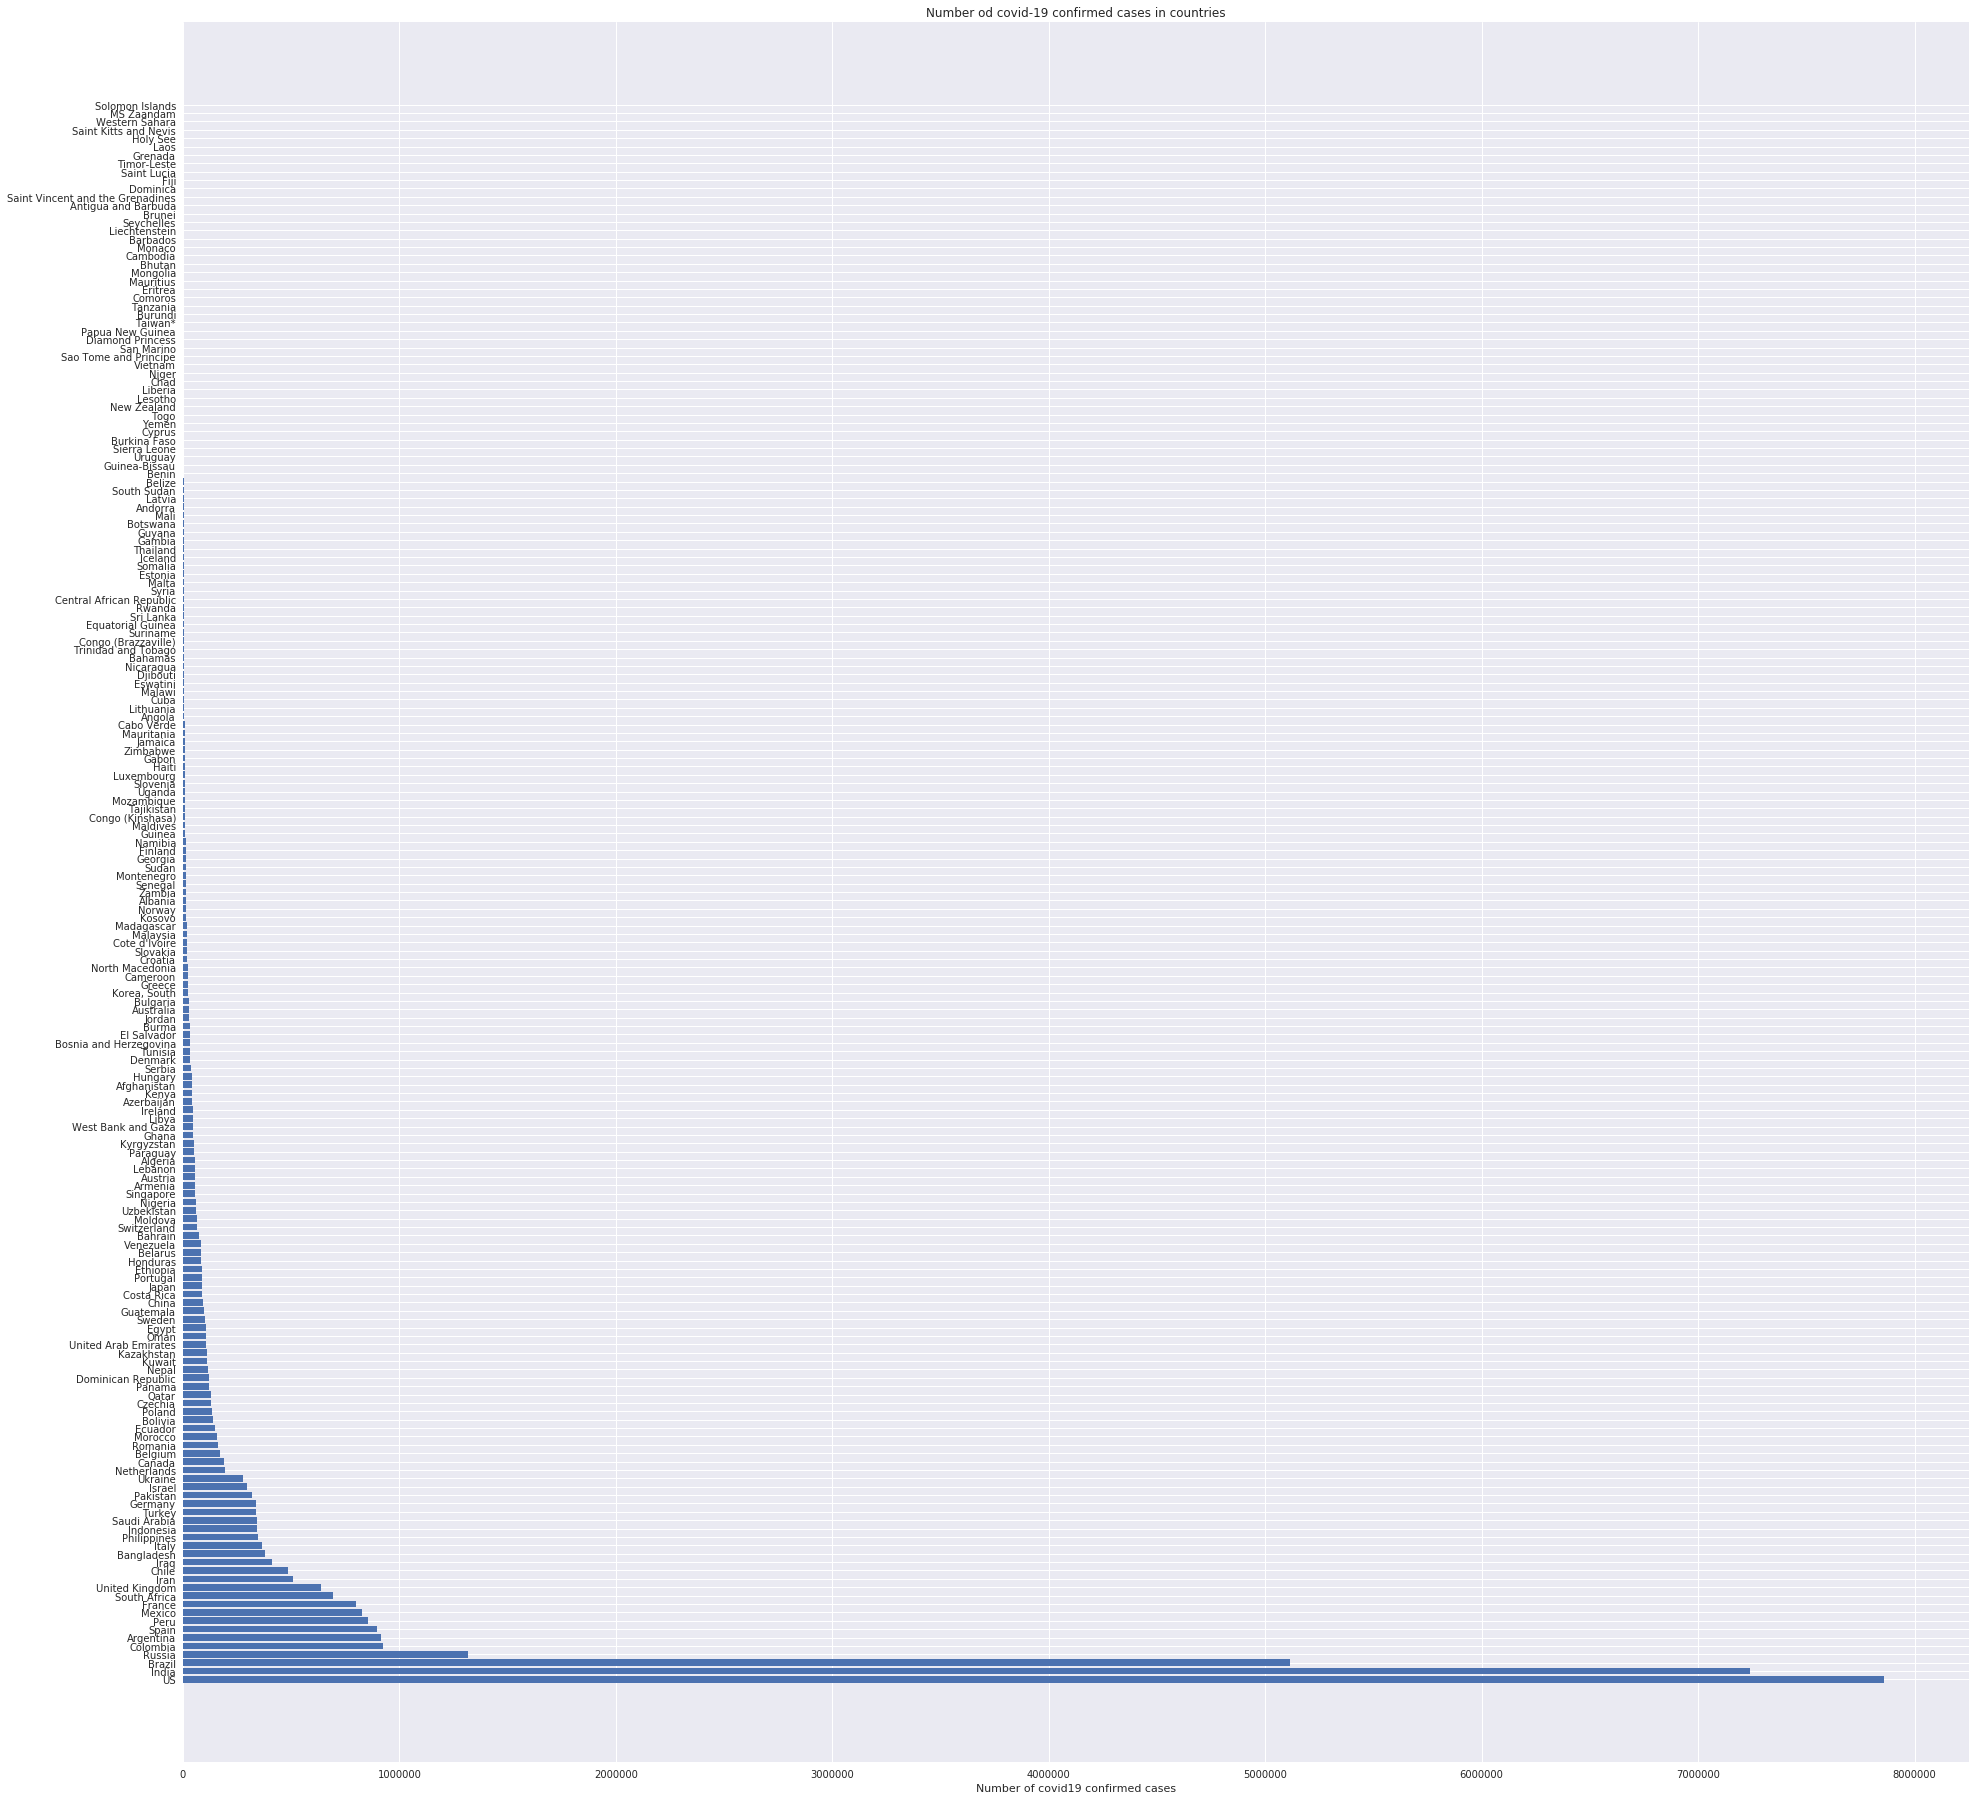

In [135]:
	# plot a bar graph to see the total confirmed cases across differnet countries 

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title("Number of covid-19 confirmed cases in countries")
plt.xlabel("Number of covid19 confirmed cases")
plt.show()

In [75]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [136]:
# Using linear regression model to make predictions 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linear_model = LinearRegression(normalize = True,fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print("MAE :", mean_absolute_error(test_linear_pred, y_test_confirmed))
print("MSE :", mean_squared_error(test_linear_pred, y_test_confirmed))

MAE : 9994108.055036062
MSE : 104401128154473.53


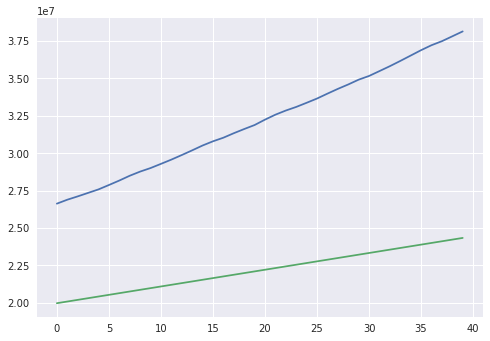

In [137]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

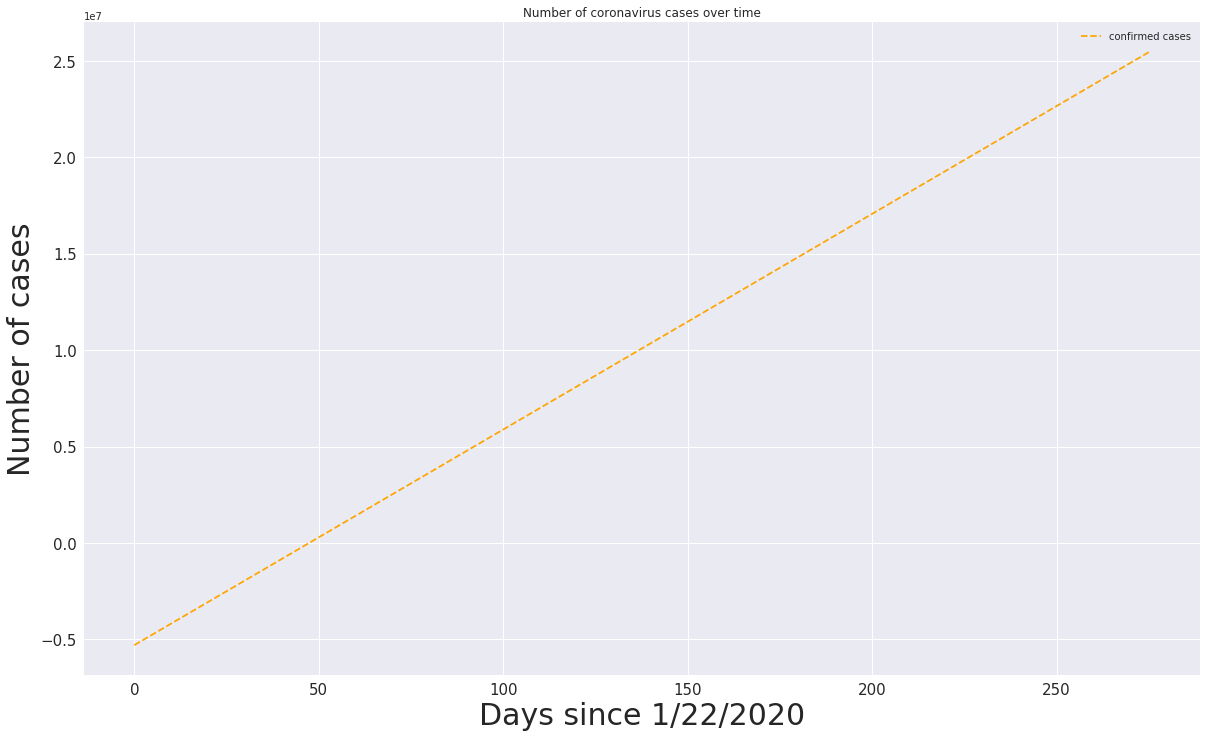

In [85]:
plt.figure(figsize=(20,12))
plt.plot(future_forecast, linear_pred, linestyle='dashed',color='orange')
plt.title('Number of coronavirus cases over time')
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of cases',size=30)
plt.legend(['confirmed cases','Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [138]:
# predictions for next 10 days using linear regression 

print('Linear regression future predictions : ')
print(linear_pred[-10:])

Linear regression future predictions : 
[[24447366.60870297]
 [24559173.07278781]
 [24670979.53687264]
 [24782786.00095747]
 [24894592.4650423 ]
 [25006398.92912713]
 [25118205.39321196]
 [25230011.85729679]
 [25341818.32138162]
 [25453624.78546645]]
